<a href="https://colab.research.google.com/github/pravinkucha/Deep-Learning/blob/master/regression_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
BHNames= ['crim','zn','indus','chas','nox','rm',
         'age','dis','rad','tax','ptratio','black','lstat','medv']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'

data = pd.read_csv(url,delim_whitespace=True,names=BHNames)
print(data.head(20))
print(data.info())

       crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0   0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1   0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2   0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3   0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4   0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
5   0.02985   0.0   2.18     0  0.458  ...  222.0     18.7  394.12   5.21  28.7
6   0.08829  12.5   7.87     0  0.524  ...  311.0     15.2  395.60  12.43  22.9
7   0.14455  12.5   7.87     0  0.524  ...  311.0     15.2  396.90  19.15  27.1
8   0.21124  12.5   7.87     0  0.524  ...  311.0     15.2  386.63  29.93  16.5
9   0.17004  12.5   7.87     0  0.524  ...  311.0     15.2  386.71  17.10  18.9
10  0.22489  12.5   7.87     0  0.524  ...  311.0     15.2  392.52  20.45  15.0
11  0.11747  12.5   7.87     0  0.524  .

In [61]:
summary = data.describe()
summary = summary.transpose()
print(summary)

         count        mean         std  ...        50%         75%       max
crim     506.0    3.613524    8.601545  ...    0.25651    3.677082   88.9762
zn       506.0   11.363636   23.322453  ...    0.00000   12.500000  100.0000
indus    506.0   11.136779    6.860353  ...    9.69000   18.100000   27.7400
chas     506.0    0.069170    0.253994  ...    0.00000    0.000000    1.0000
nox      506.0    0.554695    0.115878  ...    0.53800    0.624000    0.8710
rm       506.0    6.284634    0.702617  ...    6.20850    6.623500    8.7800
age      506.0   68.574901   28.148861  ...   77.50000   94.075000  100.0000
dis      506.0    3.795043    2.105710  ...    3.20745    5.188425   12.1265
rad      506.0    9.549407    8.707259  ...    5.00000   24.000000   24.0000
tax      506.0  408.237154  168.537116  ...  330.00000  666.000000  711.0000
ptratio  506.0   18.455534    2.164946  ...   19.05000   20.200000   22.0000
black    506.0  356.674032   91.294864  ...  391.44000  396.225000  396.9000

In [62]:
#To Scale data from 0 to 1 apply preprocessing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Data_scaled = scaler.fit_transform(data)
Data_scaled = pd.DataFrame(Data_scaled,columns=BHNames)
summary = Data_scaled.describe()
summary = summary.transpose()
print(summary)

         count      mean       std  min       25%       50%       75%  max
crim     506.0  0.040544  0.096679  0.0  0.000851  0.002812  0.041258  1.0
zn       506.0  0.113636  0.233225  0.0  0.000000  0.000000  0.125000  1.0
indus    506.0  0.391378  0.251479  0.0  0.173387  0.338343  0.646628  1.0
chas     506.0  0.069170  0.253994  0.0  0.000000  0.000000  0.000000  1.0
nox      506.0  0.349167  0.238431  0.0  0.131687  0.314815  0.491770  1.0
rm       506.0  0.521869  0.134627  0.0  0.445392  0.507281  0.586798  1.0
age      506.0  0.676364  0.289896  0.0  0.433831  0.768280  0.938980  1.0
dis      506.0  0.242381  0.191482  0.0  0.088259  0.188949  0.369088  1.0
rad      506.0  0.371713  0.378576  0.0  0.130435  0.173913  1.000000  1.0
tax      506.0  0.422208  0.321636  0.0  0.175573  0.272901  0.914122  1.0
ptratio  506.0  0.622929  0.230313  0.0  0.510638  0.686170  0.808511  1.0
black    506.0  0.898568  0.230205  0.0  0.945730  0.986232  0.998298  1.0
lstat    506.0  0.301409 

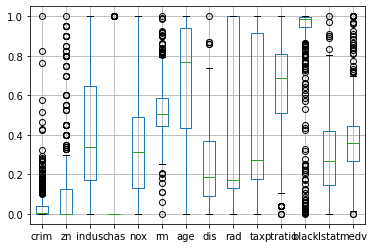

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 

In [63]:
import matplotlib.pyplot as plt
boxplot = Data_scaled.boxplot(column=BHNames)
plt.show()

Cordata = Data_scaled.corr(method='pearson')
with pd.option_context('display.max_rows',None,'display.max_columns',Cordata.shape[1] ):
  print(Cordata)


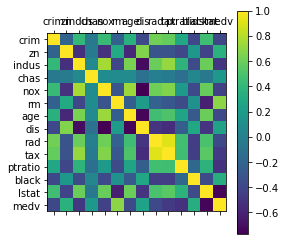

In [64]:
plt.matshow(Cordata)
plt.xticks(range(len(Cordata.columns)),Cordata.columns)
plt.yticks(range(len(Cordata.columns)),Cordata.columns)
plt.colorbar()
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
X  = Data_scaled.drop('medv',axis=1)
print("X shape = ",X.shape)
Y  = Data_scaled['medv']
print("Y shape = ",Y.shape)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30, random_state=5)
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("Y_train shape = ",Y_train.shape)
print("Y_test shape = ",Y_test.shape)


X shape =  (506, 13)
Y shape =  (506,)
X_train shape =  (354, 13)
X_test shape =  (152, 13)
Y_train shape =  (354,)
Y_test shape =  (152,)


In [0]:
# Import keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
reg_model = Sequential()
#First input and First hidden layer
reg_model.add(Dense(20,input_dim=13,activation='relu'))
#Second hidden layer
reg_model.add(Dense(10,activation='relu'))
#output Layer
reg_model.add(Dense(1,activation='linear'))

#Compile ANN
reg_model.compile(optimizer="adam",loss="mean_squared_error",metrics=['accuracy'])


In [67]:
#fit the mode and display the summar
reg_model.fit(X_train,Y_train,epochs=100,verbose=1)

Epoch 1/100
354/354 [==============================] - 0s 276us/step - loss: 0.3153 - accuracy: 0.0056
Epoch 2/100
354/354 [==============================] - 0s 48us/step - loss: 0.1855 - accuracy: 0.0056
Epoch 3/100
354/354 [==============================] - 0s 46us/step - loss: 0.1135 - accuracy: 0.0085
Epoch 4/100
354/354 [==============================] - 0s 52us/step - loss: 0.0708 - accuracy: 0.0085
Epoch 5/100
354/354 [==============================] - 0s 56us/step - loss: 0.0430 - accuracy: 0.0085
Epoch 6/100
354/354 [==============================] - 0s 45us/step - loss: 0.0393 - accuracy: 0.0141
Epoch 7/100
354/354 [==============================] - 0s 49us/step - loss: 0.0370 - accuracy: 0.0141
Epoch 8/100
354/354 [==============================] - 0s 52us/step - loss: 0.0350 - accuracy: 0.0141
Epoch 9/100
354/354 [==============================] - 0s 54us/step - loss: 0.0331 - accuracy: 0.0141
Epoch 10/100
354/354 [==============================] - 0s 52us/step - loss: 0.03

In [68]:
reg_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [71]:
y_predKM = reg_model.predict(X_test)
score = reg_model.evaluate(X_test,Y_test,verbose=1)
print(score[0])

152/152 [==============================] - 0s 54us/step
0.010929877624699944


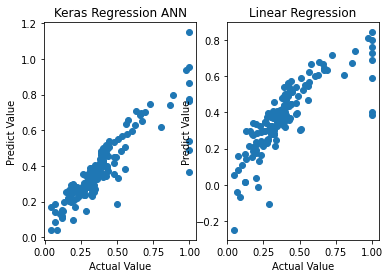

Linear Regressio Mean Squared Error
0.015159030964982022


In [72]:
#Linear regression
from sklearn.linear_model import LinearRegression
LModel = LinearRegression()
LModel.fit(X_train,Y_train)
y_predLM = LModel.predict(X_test)
plt.figure(1)
plt.subplot(121)
plt.scatter(Y_test,y_predKM)
plt.xlabel("Actual Value")
plt.ylabel("Predict Value")
plt.title("Keras Regression ANN")

plt.subplot(122)
plt.scatter(Y_test,y_predLM)
plt.xlabel("Actual Value")
plt.ylabel("Predict Value")
plt.title("Linear Regression")
plt.show()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,y_predLM)
print("Linear Regressio Mean Squared Error")
print(mse)